# Vizualizácia stromov

Tu načítame a skontrolujeme súbor tried stromov a súbory funkcií a knižníc

![popis obrázku](extrakcia_roope_4.jpg)

![popis obrázku](extrakcia_rf_roope.jpg)

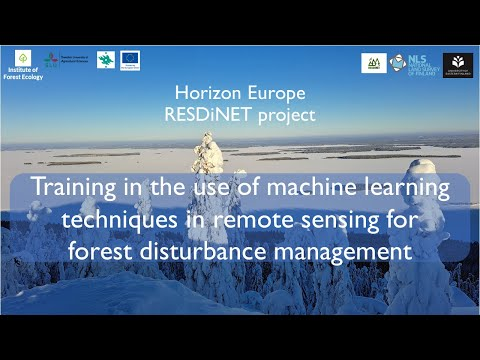

In [4]:
from IPython.display import YouTubeVideo

# Vložte ID videa z URL
video_id = "Q5U6fvVjCS4"

# Zobrazenie videa v Jupyter Notebooku
display(YouTubeVideo(video_id))

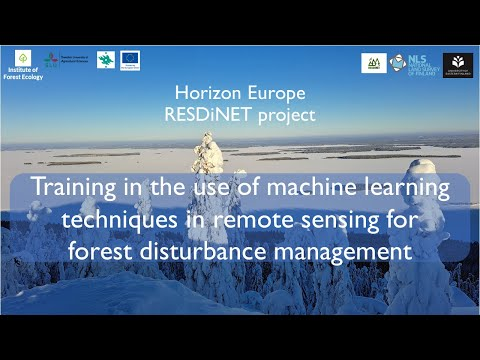

In [5]:
# Vložte ID videa z URL
video_id = "W7AR62TT07k"

# Zobrazenie videa v Jupyter Notebooku
display(YouTubeVideo(video_id))

### Import knižníc

In [1]:
import pandas as pd # Knižnica pre manipuláciu a analýzu dát.
import numpy as np # Knižnica pre podporu vektorov, matíc a veľkých viacdimenzionálnych polí.
import matplotlib.pyplot as plt # Knižnica pre tvorbu statických, animovaných a interaktívnych vizualizácií v Pythone.
import seaborn as sns # Knižnica založená na matplotlibe, ktorá poskytuje vyššiu úroveň rozhrania pre kreslenie atraktívnych a informatívnych štatistických grafík.

### Načítanie a preskúmanie súboru údajov o triedach stromov

In [ ]:
# súbor s triedami stromov (Health, Infested, Dead) 
trees_fielddata_file = "C:/Users/matus/Downloads/ML_Finland/data_3/tree_classes.txt"
# load data
trees_data = pd.read_csv(trees_fielddata_file, delimiter=',',index_col=[0])

print(trees_data.columns)
print(trees_data.shape)
#print(trees_data)

In [ ]:
# Zobrazenie tried stromov a počet stromov v každej triede
class_count = pd.DataFrame(trees_data['classes'].value_counts())

print(class_count)

In [ ]:
# Nespúšťaj 
# určenie farebnej škály pre lepšiu vizualizáciu
class_colors = {0: 'green', 1: 'orange', 2: 'red'}
class_labels = {0: 'healthy', 1: 'infested', 2: 'dead'}
plt.figure()

# Plot each class separately and add to legend
for cls, color in class_colors.items():
    subset = trees_data[trees_data['classes'] == cls]
    plt.scatter(subset['X'], subset['Y'], color=color,edgecolor='black', label=class_labels[cls])
# Add legend
plt.legend()
plt.title('Tree classes distribution')
plt.tight_layout()
plt.show()

![popis obrázku](distribucia_stromov_Raquell.jpg)

### Načítanie spektrálnych charakteristík

Spektrálne charakteristiky sú statické hodnoty, ktoré sa vypočítajú z pásiem multispektrálnej ortomozaiky dronu vytvorenej pomocou kamery Micasense Altum.
Podrobnejšie informácie o výpočte charakteristík nájdete na stránke https://link.springer.com/article/10.1007/s11119-023-10064-2

Ide vlastne os priemery, mediány a vegetačné indexy

In [ ]:
# súbor s lokaciami stromov a ich triedami (Health, Infested, Dead) 
ms_spec_feat_file = "C:/Users/matus/Downloads/ML_Finland/data_3/MS_altum_SPECFeatures.csv"

# načítanie údajov
ms_spefeat_data = pd.read_csv(ms_spec_feat_file, delimiter=',',index_col=[0])
print('Počet stromov a charekteristík:',ms_spefeat_data.shape)
ms_spefeat_data.head()

In [ ]:
# Vizualizácia rozdelenia početností spojitých charakteristík
plt.figure(figsize=(20,15))
for idx, col in enumerate(ms_spefeat_data.columns):
    plt.subplot(10, 5, idx+1)
    plt.hist(ms_spefeat_data[col])
    plt.title(col)
plt.tight_layout()

In [ ]:
# Zobraz kontingenčnú tabuľku
corr_array = ms_spefeat_data.corr()
corr_array.head()

In [ ]:
# Korelačná heatmapa
plt.figure(figsize=(12,10))
sns.heatmap(corr_array)

In [ ]:
# Plot mean spectra per class

bands_ms = [475, 560, 668, 717, 842]
meanspec_class0 = ms_spefeat_data[ trees_data['classes']==0].mean()[0:5]
meanspec_class1 = ms_spefeat_data[ trees_data['classes']==1].mean()[0:5]
meanspec_class2 = ms_spefeat_data[ trees_data['classes']==2].mean()[0:5]

std_class0 = ms_spefeat_data[ trees_data['classes']==0].std()[0:5]
std_class1 = ms_spefeat_data[ trees_data['classes']==1].std()[0:5]
std_class2 = ms_spefeat_data[ trees_data['classes']==2].std()[0:5]

plt.figure(figsize=(10,6))
plt.plot(bands_ms, meanspec_class0.values, color='g', label= 'Zdravé stromy')
plt.errorbar(bands_ms, meanspec_class0.values, yerr=std_class0.values, fmt='o', color='g', capsize=5)

plt.plot(bands_ms, meanspec_class1.values, color='orange', label= 'Napadnuté stromy')
plt.errorbar(bands_ms, meanspec_class1.values, yerr=std_class1.values, fmt='o', color='orange', capsize=5)

plt.plot(bands_ms, meanspec_class2.values, color='r', label= 'Mŕtve stromy')
plt.errorbar(bands_ms, meanspec_class2.values, yerr=std_class2.values, fmt='o', color='r', capsize=5)

plt.grid()
plt.legend()
plt.title('Priemerný spektrálny signál každej triedy')
plt.xlabel('Odrazivosť')
plt.ylabel('Vlnová dĺžka')
plt.show()

### Načítaj vlastnosti vegetačných indexov

Prvky vegetačných indexov (VI) boli vypočítané z pásiem multispektrálnej ortomozaiky z dronu vytvorenej pomocou kamery Micasense Altum.
Podrobnejšie informácie o výpočte prvkov nájdete na https://link.springer.com/article/10.1007/s11119-023-10064-2

In [ ]:
# súbor s lokaciami stromov a ich triedami (Health, Infested, Dead) 
ms_vis_feat_file = "C:/Users/matus/Downloads/ML_Finland/data_3/MS_altum_VIsFeatures.csv"

# Načítaj dáta
ms_visfeat_data = pd.read_csv(ms_vis_feat_file, delimiter=',',index_col=[0])
print('Počet stromov a charakteristík',ms_visfeat_data.shape)
ms_spefeat_data.head()

In [ ]:
# Vizualizácia rozdelenia početností spojitých charakteristík
plt.figure(figsize=(20,15))
for idx, col in enumerate(ms_visfeat_data.columns):
    plt.subplot(10, 5, idx+1)
    plt.hist(ms_visfeat_data[col])
    plt.title(col)
plt.tight_layout()

In [ ]:
# Zobraz kontingenčnú tabuľku
corr_array = ms_visfeat_data.corr()
corr_array.head()

In [ ]:
# Korelačná heatmapa
plt.figure(figsize=(10,10))
sns.heatmap(corr_array)

# Klasifikácia zdravotného stavu stromov pomocou klasifikátora Random Forest

Tu načítame a skontrolujeme súbor tried stromov a súbory charakteristík a vykonáme klasifikáciu zdravotného stavu stromov pomocou Random Forest klasifikátora.
Použijeme nástroje Scikit-learn.

### Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, StratifiedKFold


In [ ]:
# súbor s triedami stromov (Health, Infested, Dead) 
trees_fielddata_file = "C:/Users/matus/Downloads/ML_Finland/data_3/tree_classes.txt"

# Načítať data
trees_data = pd.read_csv(trees_fielddata_file, delimiter=',',index_col=[0])
print(trees_data.head())

# features file

feat_file = "C:/Users/matus/Downloads/ML_Finland/data_3/MS_altum_SPEC_VIsFeatures.csv" 

#feat_file = "C:/Users/matus/Downloads/ML_Finland/data_3/MS_altum_VIsFeatures.csv"

# Načítaj data
feat_data = pd.read_csv(feat_file, delimiter=',',index_col=[0])
print('Number of trees and features:',feat_data.shape)
#feat_data.head()# file with tree location and classes

### Chýbajúce hodnoty

Niektoré nástroje nedokážu spracovať chýbajúce údaje. Jedným zo spôsobov, ako sa s tým vysporiadať, je jednoducho vymazať celé pozorovanie alebo ho nahradiť inou hodnotou (priemer, vizuálne pozorovanie atď.), ak máte dostatočné znalosti o tom, ako ho nahradiť.

In [ ]:
# kontrola chýbajúcich hodnôt v premenných
missing_data = np.where(feat_data.isnull().sum()>0)

# odstráňte stĺpce s údajmi nan (teda prázdne bunky)
feat_data = feat_data.dropna(axis=1, how='all')

print(feat_data.shape)

### Rozdelenie údajov na samostatnú trénovaciu a validačnú množinu

In [ ]:
split_size= 0.25  # definujte percento údajov, ktoré majú byť validačnými údajmi

# Rozdelenie na tréningové a validačné súbory údajov
y = pd.DataFrame(trees_data['classes'])
X = feat_data.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_size, shuffle=True, stratify=y, random_state=1)

print('Training data', y_train.value_counts(), '\n Validation data', y_test.value_counts() )


In [ ]:
# Kontrola veľkosti tréningových a validačných súborov údajov
print(X_train.shape)
print(X_test.shape)

In [ ]:
# Definujte model a jeho parametre
rfc_model = RandomForestClassifier( n_estimators = 300, random_state=1)

# prispôsobiť model
rfc_model.fit(X_train,y_train)

# Predpovedať pomocou natrénovaného modelu
y_pred = rfc_model.predict(X_test)


### Kontrola presnosti
V Scikit-learn je implementovaných niekoľko metrík, tu skontrolujeme kontingenčnú maticu a klasifikačnú správu

In [ ]:
# Kontingenčná matica
rfc_confusion_matrix = confusion_matrix(y_test, y_pred)

print(rfc_confusion_matrix)

In [ ]:
rfc_confusion_matrix_plot = ConfusionMatrixDisplay(confusion_matrix = rfc_confusion_matrix, display_labels= ['healthy','infested','dead'])
rfc_confusion_matrix_plot.plot()
plt.title("RF Confusion_matrix")

In [ ]:
# Celková správnosť
rfc_accuracy_score = accuracy_score(y_test, y_pred)

print(rfc_accuracy_score)

In [ ]:
# Správa o klasifikácii
rfc_class_report = classification_report(y_test, y_pred, digits=3)

# recall = pomer správnych k falošne správnym
# f1-score = sila spravnosti
# support = počet skutočných výskytov danej triedy v testovacej vzorke
print(rfc_class_report)

### Krížová validácia pomocou Leave-one-out a Kfold
Existujú rôzne techniky pre postup krížovej validácie.

LOOCV (krížová validácia s vynechaním jedného prvku): Každé pozorovanie sa vynechá zo súboru údajov a model sa trénuje so zostávajúcimi pozorovaniami. Tento postup sa opakuje pre každé pozorovanie v súbore údajov, čo môže byť pri veľkých súboroch údajov výpočtovo náročné.

KFold: Rozdelenie súboru údajov na k skupiny (alebo zložky). Každá zložka sa uchováva ako testovací súbor údajov, zatiaľ čo zvyšné k-1 zložky tvoria trénovací súbor údajov. Tento proces sa opakuje, kým sa k všetkým zložkám nepoužije validačný súbor údajov. KFold je výpočtovo efektívnejší ako LOOCV.

Ďalšie varianty krížového overovania KFold sú stratifikovanýKFold a RepeatedKFold.

StratifikovanýKFold: zachováva rozdelenie tried v každej zložke, čo je užitočné pre klasifikačné úlohy s nevyváženým rozdelením tried.

RepeatedKFold: opakuje proces KFold viackrát s rôznymi náhodnými rozdeleniami, čo pomáha znížiť rozptyl odhadovaného výkonu

### LOOCV

In [ ]:

rfc_model = RandomForestClassifier( n_estimators = 300, random_state=1)

#x_pred, y_pred = classification_cv(X_train, y_train, rfc_model)

cv = LeaveOneOut()

y_true = pd.DataFrame(index= y_train.index, columns = y_train.columns)
y_pred = pd.DataFrame(index= y_train.index,columns = y_train.columns)

for train_index, test_index in cv.split(X_train):
    # Split data into training and testing sets
    train_X, test_X = X_train.iloc[train_index, :], X_train.iloc[test_index, :]
    train_y, test_y = y_train.iloc[train_index, :], y_train.iloc[test_index, :]
    
    # Fit regression model
    rfc_model.fit(train_X,  train_y.values.ravel())
    
    # Make predictions on test set
    y_true.iloc[test_index,] = test_y
    y_pred.iloc[test_index,] = rfc_model.predict(test_X).reshape(-1, 1)
    #print(y_pred)


In [ ]:
# Classification report
print(classification_report(np.array(y_true.values.ravel(),dtype=np.int64), np.array(y_pred.values.ravel(),dtype=np.int64)))

# Confusion matrix
print(confusion_matrix(np.array(y_true.values.ravel(),dtype=np.int64), np.array(y_pred.values.ravel(),dtype=np.int64)))

### Kfold

In [ ]:

rfc_model = RandomForestClassifier( n_estimators = 300, random_state=1)

#x_pred, y_pred = classification_cv(X_train, y_train, rfc_model)

cv = KFold(n_splits=5, shuffle=True, random_state=1)

y_true = pd.DataFrame(index= y_train.index, columns = y_train.columns)
y_pred = pd.DataFrame(index= y_train.index,columns = y_train.columns)

for train_index, test_index in cv.split(X_train):
    # Split data into training and testing sets
    train_X, test_X = X_train.iloc[train_index, :], X_train.iloc[test_index, :]
    train_y, test_y = y_train.iloc[train_index, :], y_train.iloc[test_index, :]
    
    # Fit regression model
    rfc_model.fit(train_X,  train_y.values.ravel())
    
    # Make predictions on test set
    y_true.iloc[test_index,] = test_y
    y_pred.iloc[test_index,] = rfc_model.predict(test_X).reshape(-1, 1)

    print(classification_report(test_y, rfc_model.predict(test_X).reshape(-1, 1)))
    

# StratifiedKFold

In [ ]:
rfc_model = RandomForestClassifier( n_estimators = 300, random_state=1)

#x_pred, y_pred = classification_cv(X_train, y_train, rfc_model)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

y_true = pd.DataFrame(index= y_train.index, columns = y_train.columns)
y_pred = pd.DataFrame(index= y_train.index,columns = y_train.columns)

for train_index, test_index in cv.split(X_train,y_train):
    # Split data into training and testing sets
    train_X, test_X = X_train.iloc[train_index, :], X_train.iloc[test_index, :]
    train_y, test_y = y_train.iloc[train_index, :], y_train.iloc[test_index, :]
    
    # Fit regression model
    rfc_model.fit(train_X,  train_y.values.ravel())
    
    # Make predictions on test set
    y_true.iloc[test_index,] = test_y
    y_pred.iloc[test_index,] = rfc_model.predict(test_X).reshape(-1, 1)

    print(classification_report(test_y, rfc_model.predict(test_X).reshape(-1, 1)))


### Dôležitosť funkcie
Vykreslenie dôležitosti funkcie z Random Forest klasifikačného modelu. Hodnoty možno použiť ako spôsob výberu funkcií.

In [ ]:
# Definujte model a jeho parametre 
rfc_model = RandomForestClassifier( n_estimators = 300, random_state=1)

# prispôsobiť model
rfc_model.fit(X_train,y_train)

# Predpovedať pomocou natrénovaného modelu
y_pred = rfc_model.predict(X_test)

feature_importances = pd.Series(rfc_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
#print(feature_importances.index[:10])
# Creating a seaborn bar plot
fig = plt.figure(figsize=(8, 16))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('RF Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')
plt.tight_layout()

# save figure
#output_dir = "C:/Users/matus/Downloads/ML_Finland/data_3/ml_koli2024/"
#output_file =  output_dir + 'rfc_featimportances.png'
#plt.savefig(output_file, bbox_inches='tight', dpi = 250)
#plt.show()


In [6]:
%load_ext watermark
# Zobrazí verzie Pythonu, použitých balíčkov a systémové informácie
%watermark -v -m -p IPython,pandas,numpy,matplotlib,seaborn,scikit-learn,sklearn,watermark

print(" ")

# Zobrazí dátum a čas poslednej úpravy notebooku
%watermark -u -n -t -z


The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.11.4
IPython version      : 8.15.0

IPython     : 8.15.0
pandas      : 2.0.3
numpy       : 1.24.3
matplotlib  : 3.7.2
seaborn     : 0.12.2
scikit-learn: 1.3.0
sklearn     : 1.3.0
watermark   : 2.4.3

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : AMD64 Family 23 Model 96 Stepping 1, AuthenticAMD
CPU cores   : 12
Architecture: 64bit

 
Last updated: Tue Apr 02 2024 12:13:05Západoeurópsky cas (letný)

